In [93]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import scipy
import scipy.linalg

In [94]:
#Setting up functions for implementation
def sign(u):
  """
  Sign function 

  return 1 is u is positive
  return -1 if u is negative
  return 0 is u is zero
  """
  if (u>0):
    return 1
  elif (u<0):
    return -1
  else:
    return 0

def calc_weights(patterns, N):
  """
  Calculates edge weights using outer product learning rule: sum_a P_i^a P_j^a

  Returns 2D nxn array where n is the number of nodes in the network
  """
  T = np.zeros((N*N, N*N))
  rho = np.sum([np.sum(pattern.flatten()) for pattern in patterns]) / (len(patterns)*N*N)
  for image in patterns:
    img = image.flatten() - rho 
    T += np.outer(img, img)
  for i in range(N*N):
    T[i][i] = 0
  return T
def calc_u(V, T):
  """
  calculates U
  """
  U = []
  for i in range(len(V)):
    U.append(0)
    for j in range(len(V)):
      U[i] += T[i][j] * V[j]
   
  return np.array(U)

def calc_u_i(i, V, T):
  """
  caculates U_i
  """
  U = 0
  for j in range(len(V)):
    U += T[i][j] * V[j]
  return U

def network_dynamic_iteration(V, T, mode):
  """
  Returns the result from running dynamics for one step on V
  """
  print("updating")
  if (mode == 0): #synchronous
    # U = calc_u(V, T)
    # for i in range(len(V)):
    #   V[i] = sign(U[i]) if  sign(U[i]) != 0 else V[i]

    V = np.sign(T @ V)
    return V
  else: #asynchronous
    for i in range(int(len(V)/5)):
       idx = np.random.randint(0, len(V)) 
                    # Update s
       V[idx] = np.sign(T[idx].T @ V)
    return V
def Convert(string): #from geekstogeeks
    """
    returns a list version of string where each element is one character from string
    """
    list1=[] 
    list1[:0]=string 
    return list1 

def zero_to_neg(arr):
  """
  Converts 0 entries in arr to -1
  """
  # for i in range(len(arr)):
    
  #   if int(arr[i]) == 0:
  #     arr[i] = -1
  #   else: 
  #     arr[i] = int(arr[i])
  arr[arr == 0] = -1
  return arr

def add_ortho_patt(patterns, N, threshold):
  """
  adds a new pattern to patterns that is orthogonal to the rest of the patterns in patterns
  """
  looking = True
  while (looking):
    a = Convert(np.binary_repr(random.getrandbits(N*N), width = N*N))
    a = zero_to_neg(a)
    a = np.array(a)
    ortho = True #assume orthogonal to all patterns
    for i in range(len(patterns)):
      ptn = copy.deepcopy(patterns[i])
      if (np.dot(a, ptn.flatten())) <= N*N*threshold:
        ortho = False
    looking = not ortho
  a.reshape((N, N))
  patterns.append(a)

def generate_pattern(patterns, N):
  """
  appends an N bit pattern to patterns
  """
  a = Convert(np.binary_repr(random.getrandbits(N*N), width = N*N))
  a = zero_to_neg(a)
  a = np.array(a)
  patterns.append(a)

In [95]:
#image displays

def display_patterns(patterns):
  for i in patterns:
    plt.imshow(i, None)
    plt.show()

def display_network(V, N, writer = None):
  """
  Displays the state of the network V
  """
  # V_copy = copy.deepcopy(V)
  # V_copy = V_copy.reshape((N, N))
  plt.imshow(V.reshape(N, N), None)
  
  
    
    



In [112]:
from typing import Pattern
#running the network
def energy(V, T):
  """
  Energy function
  """
  # V = V.flatten()
  # E=0
  # for i in range(len(V)):
  #   # inner = 0
  #   for j in range(len(V)):
  #     if i != j:
  #       E += T[i][j] * V[i] * V[j]
  #   # E+=inner
  E = -0.5* V @ T @ V 
  return E 
def run_hopfield(pattern, iterations, mode, N, T):
  
  V = copy.deepcopy(pattern).flatten()
  display_network(V, None)
  for epoch in range(iterations):
    print("epoch", epoch)
    V = network_dynamic_iteration(V, T, mode)
    display_network(V)
  return V.reshape(N, N)
def run_hopfield_stable(pattern, mode, N, T, display = False, writer = None):
  plt.clf()
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  ax1.set_title('Network State')
  ax2.set_title('Energy')
  e = []
  V = pattern.flatten()
  unstable = True
  epoch = 0
  print("original")
  # display_network(V, N)
  e.append(energy(V, T))
  plt.clf()
  # ax1 = fig.add_subplot(121)
  # ax2 = fig.add_subplot(122)
  ax1.imshow(V.reshape(N, N), None)
  ax2.plot(range(len(e)),e)
  plt.draw()
  plt.pause(0.01)
  writer.grab_frame()
  e_old = e[-1]+1
  while (unstable) and e_old >= energy(V, T):
    print("epoch", epoch)
    old = copy.copy(V)
    e_old = e[-1]
    V = network_dynamic_iteration(V, T, mode)
    if (display and writer):
      plt.clf()
      # ax1 = fig.add_subplot(121)
      # ax2 = fig.add_subplot(122)
      ax1.imshow(V.reshape(N, N), None)
      ax2.plot(range(len(e)),e)
      plt.draw()
      plt.pause(0.01)
      writer.grab_frame()
    elif display:
      plt.imshow(V.reshape(N,N), None)
      plt.show()
    if np.array_equal(old, V):
      unstable = False
    del old
    epoch += 1
    e.append(energy(V, T))
  print("Final")
  fig.clear()
  plt.imshow(V.reshape(N, N), None)
  plt.plot(range(len(e)),e)
  if writer:
    plt.clf()
    # ax1 = fig.add_subplot(121)
    # ax2 = fig.add_subplot(122)
    ax1.imshow(V.reshape(N, N), None)
    ax2.plot(range(len(e)),e)
    plt.draw()
    plt.pause(0.01)
    writer.grab_frame()
  plt.show()
  return V.reshape(N, N)



In [111]:
def show_diff(pattern1, pattern2):
  """
  visualise differences between two patterns
  """

  diff = np.equal(pattern1, pattern2)
  print("pattern 1")
  plt.imshow(pattern1)
  plt.show()
  print("pattern 2")
  plt.imshow(pattern2)
  plt.show()
  print("highlighting differences")
  plt.imshow(diff)
  plt.show()
  return np.array_equal(pattern1, pattern2)

def perturb(n, pattern):
  """
  perturnbs n bits in pattern and returns it
  """
  pattern = copy.deepcopy(pattern)
  for i in range(n):
    a = random.randint(0, len(pattern)-1)
    b = random.randint(0, len(pattern)-1)
    pattern[a][b] = pattern[a][b] * -1
  return zero_to_neg(pattern)
def find_pattern(pattern, patterns):
  for i in range(len(patterns)):
    if np.array_equal(pattern, patterns[i]):
      print(i)
      plt.imshow(patterns[i])
      plt.show()
      return True
  return False

In [98]:
data[0]

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1]])

In [100]:
import skimage as skimage
from skimage.color import rgb2gray 
from skimage.transform import resize
from skimage.filters import threshold_mean

camera = skimage.data.camera()
astronaut = rgb2gray(skimage.data.astronaut())
horse = skimage.data.horse()
coffee = rgb2gray(skimage.data.coffee())

data = [camera, astronaut, horse, coffee]
for i in range(len(data)):
    img = resize(data[i], (128,128), mode='reflect')
    thresh = threshold_mean(img)
    black_white = img > thresh
    int_img = 2*(black_white*1)-1 # Boolean to int

    data[i] = int_img



starting
original


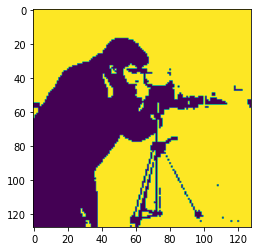

epoch 0
updating


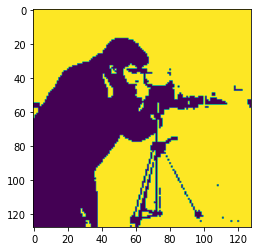

Final


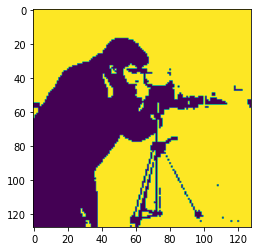

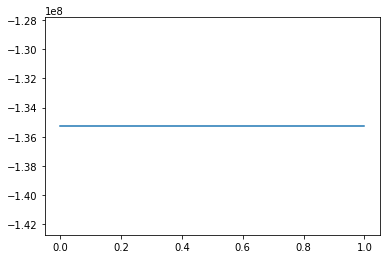

original


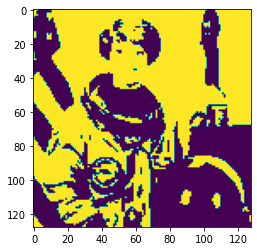

epoch 0
updating


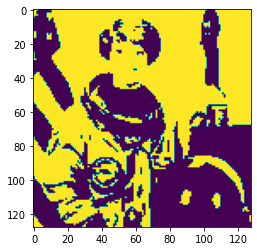

Final


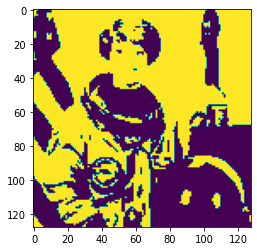

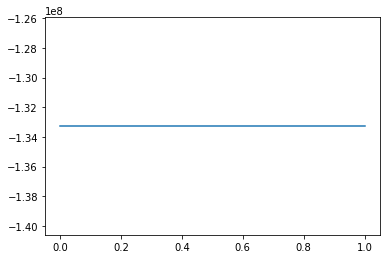

original


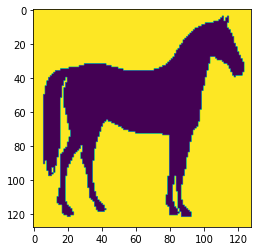

epoch 0
updating


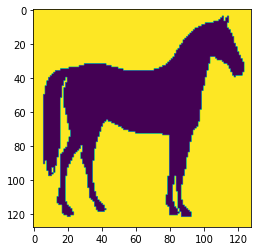

Final


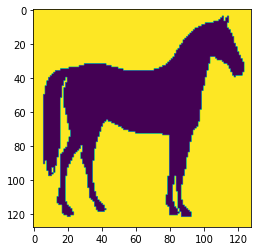

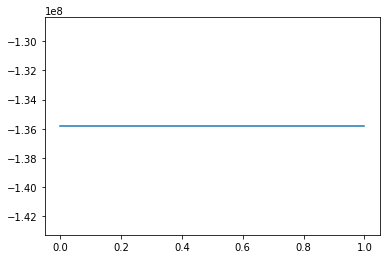

original


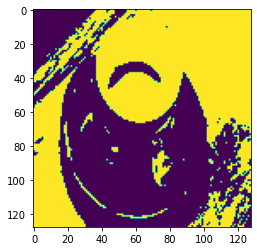

epoch 0
updating


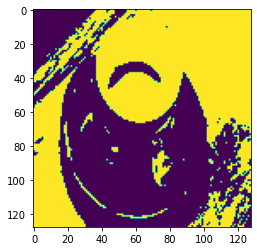

Final


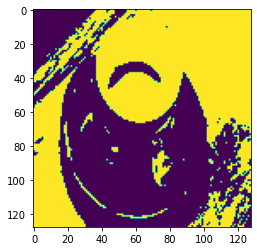

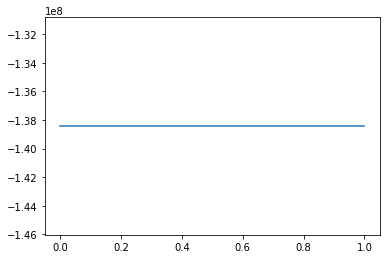

In [89]:
res = []
correct = 0
N = 128
pats = []
# square_img = square_img.astype(int)
# for i in [1, 3, 2]:
#   black_white = x_train[i]  > 1
#   black_white = black_white.astype(int)
#   pats.append(zero_to_neg(black_white))
T = calc_weights(data, N)
print("starting")
for pat in data:
  correct += int(np.array_equal(pat, run_hopfield_stable(pat, 1, N, T, display = True)))

In [91]:
for i in range(len(data)):
  print(np.unique(perturb(4000, data[i])))

[-1  1]
[-1  1]
[-1  1]
[-1  1]


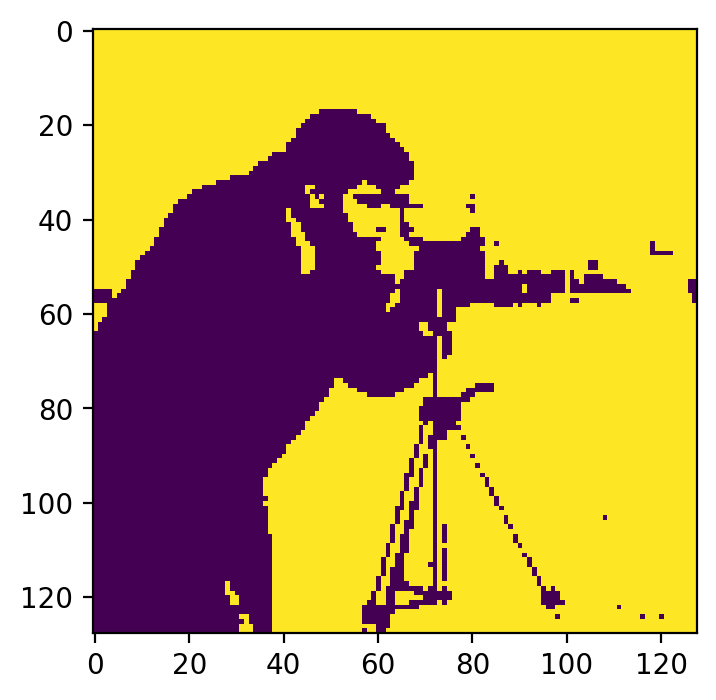

original


<Figure size 432x288 with 0 Axes>

epoch 0
updating


<Figure size 432x288 with 0 Axes>

epoch 1
updating


<Figure size 432x288 with 0 Axes>

epoch 2
updating


<Figure size 432x288 with 0 Axes>

epoch 3
updating


<Figure size 432x288 with 0 Axes>

epoch 4
updating


<Figure size 432x288 with 0 Axes>

epoch 5
updating


<Figure size 432x288 with 0 Axes>

epoch 6
updating


<Figure size 432x288 with 0 Axes>

epoch 7
updating


<Figure size 432x288 with 0 Axes>

epoch 8
updating


<Figure size 432x288 with 0 Axes>

epoch 9
updating


<Figure size 432x288 with 0 Axes>

epoch 10
updating


<Figure size 432x288 with 0 Axes>

epoch 11
updating


<Figure size 432x288 with 0 Axes>

epoch 12
updating


<Figure size 432x288 with 0 Axes>

epoch 13
updating


<Figure size 432x288 with 0 Axes>

epoch 14
updating


<Figure size 432x288 with 0 Axes>

epoch 15
updating


<Figure size 432x288 with 0 Axes>

epoch 16
updating


<Figure size 432x288 with 0 Axes>

epoch 17
updating


<Figure size 432x288 with 0 Axes>

epoch 18
updating


<Figure size 432x288 with 0 Axes>

epoch 19
updating


<Figure size 432x288 with 0 Axes>

epoch 20
updating


<Figure size 432x288 with 0 Axes>

epoch 21
updating


<Figure size 432x288 with 0 Axes>

epoch 22
updating


<Figure size 432x288 with 0 Axes>

epoch 23
updating


<Figure size 432x288 with 0 Axes>

epoch 24
updating


<Figure size 432x288 with 0 Axes>

epoch 25
updating


<Figure size 432x288 with 0 Axes>

epoch 26
updating


<Figure size 432x288 with 0 Axes>

epoch 27
updating


<Figure size 432x288 with 0 Axes>

epoch 28
updating


<Figure size 432x288 with 0 Axes>

epoch 29
updating


<Figure size 432x288 with 0 Axes>

epoch 30
updating


<Figure size 432x288 with 0 Axes>

epoch 31
updating


<Figure size 432x288 with 0 Axes>

epoch 32
updating


<Figure size 432x288 with 0 Axes>

epoch 33
updating


<Figure size 432x288 with 0 Axes>

epoch 34
updating


<Figure size 432x288 with 0 Axes>

Final


<Figure size 432x288 with 0 Axes>

answer


<Figure size 432x288 with 0 Axes>

original


<Figure size 432x288 with 0 Axes>

epoch 0
updating


<Figure size 432x288 with 0 Axes>

epoch 1
updating


<Figure size 432x288 with 0 Axes>

epoch 2
updating


<Figure size 432x288 with 0 Axes>

epoch 3
updating


<Figure size 432x288 with 0 Axes>

epoch 4
updating


<Figure size 432x288 with 0 Axes>

epoch 5
updating


<Figure size 432x288 with 0 Axes>

epoch 6
updating


<Figure size 432x288 with 0 Axes>

epoch 7
updating


<Figure size 432x288 with 0 Axes>

epoch 8
updating


<Figure size 432x288 with 0 Axes>

epoch 9
updating


<Figure size 432x288 with 0 Axes>

epoch 10
updating


<Figure size 432x288 with 0 Axes>

epoch 11
updating


<Figure size 432x288 with 0 Axes>

epoch 12
updating


<Figure size 432x288 with 0 Axes>

epoch 13
updating


<Figure size 432x288 with 0 Axes>

epoch 14
updating


<Figure size 432x288 with 0 Axes>

epoch 15
updating


<Figure size 432x288 with 0 Axes>

epoch 16
updating


<Figure size 432x288 with 0 Axes>

epoch 17
updating


<Figure size 432x288 with 0 Axes>

epoch 18
updating


<Figure size 432x288 with 0 Axes>

epoch 19
updating


<Figure size 432x288 with 0 Axes>

epoch 20
updating


<Figure size 432x288 with 0 Axes>

epoch 21
updating


<Figure size 432x288 with 0 Axes>

epoch 22
updating


<Figure size 432x288 with 0 Axes>

epoch 23
updating


<Figure size 432x288 with 0 Axes>

epoch 24
updating


<Figure size 432x288 with 0 Axes>

epoch 25
updating


<Figure size 432x288 with 0 Axes>

epoch 26
updating


<Figure size 432x288 with 0 Axes>

epoch 27
updating


<Figure size 432x288 with 0 Axes>

epoch 28
updating


<Figure size 432x288 with 0 Axes>

epoch 29
updating


<Figure size 432x288 with 0 Axes>

epoch 30
updating


<Figure size 432x288 with 0 Axes>

epoch 31
updating


<Figure size 432x288 with 0 Axes>

epoch 32
updating


<Figure size 432x288 with 0 Axes>

epoch 33
updating


<Figure size 432x288 with 0 Axes>

Final


<Figure size 432x288 with 0 Axes>

answer


<Figure size 432x288 with 0 Axes>

original


<Figure size 432x288 with 0 Axes>

epoch 0
updating


<Figure size 432x288 with 0 Axes>

epoch 1
updating


<Figure size 432x288 with 0 Axes>

epoch 2
updating


<Figure size 432x288 with 0 Axes>

epoch 3
updating


<Figure size 432x288 with 0 Axes>

epoch 4
updating


<Figure size 432x288 with 0 Axes>

epoch 5
updating


<Figure size 432x288 with 0 Axes>

epoch 6
updating


<Figure size 432x288 with 0 Axes>

epoch 7
updating


<Figure size 432x288 with 0 Axes>

epoch 8
updating


<Figure size 432x288 with 0 Axes>

epoch 9
updating


<Figure size 432x288 with 0 Axes>

epoch 10
updating


<Figure size 432x288 with 0 Axes>

epoch 11
updating


<Figure size 432x288 with 0 Axes>

epoch 12
updating


<Figure size 432x288 with 0 Axes>

epoch 13
updating


<Figure size 432x288 with 0 Axes>

epoch 14
updating


<Figure size 432x288 with 0 Axes>

epoch 15
updating


<Figure size 432x288 with 0 Axes>

epoch 16
updating


<Figure size 432x288 with 0 Axes>

epoch 17
updating


<Figure size 432x288 with 0 Axes>

epoch 18
updating


<Figure size 432x288 with 0 Axes>

epoch 19
updating


<Figure size 432x288 with 0 Axes>

epoch 20
updating


<Figure size 432x288 with 0 Axes>

epoch 21
updating


<Figure size 432x288 with 0 Axes>

epoch 22
updating


<Figure size 432x288 with 0 Axes>

epoch 23
updating


<Figure size 432x288 with 0 Axes>

epoch 24
updating


<Figure size 432x288 with 0 Axes>

epoch 25
updating


<Figure size 432x288 with 0 Axes>

epoch 26
updating


<Figure size 432x288 with 0 Axes>

epoch 27
updating


<Figure size 432x288 with 0 Axes>

Final


<Figure size 432x288 with 0 Axes>

answer


<Figure size 432x288 with 0 Axes>

original


<Figure size 432x288 with 0 Axes>

epoch 0
updating


<Figure size 432x288 with 0 Axes>

epoch 1
updating


<Figure size 432x288 with 0 Axes>

epoch 2
updating


<Figure size 432x288 with 0 Axes>

epoch 3
updating


<Figure size 432x288 with 0 Axes>

epoch 4
updating


<Figure size 432x288 with 0 Axes>

epoch 5
updating


<Figure size 432x288 with 0 Axes>

epoch 6
updating


<Figure size 432x288 with 0 Axes>

epoch 7
updating


<Figure size 432x288 with 0 Axes>

epoch 8
updating


<Figure size 432x288 with 0 Axes>

epoch 9
updating


<Figure size 432x288 with 0 Axes>

epoch 10
updating


<Figure size 432x288 with 0 Axes>

epoch 11
updating


<Figure size 432x288 with 0 Axes>

epoch 12
updating


<Figure size 432x288 with 0 Axes>

epoch 13
updating


<Figure size 432x288 with 0 Axes>

epoch 14
updating


<Figure size 432x288 with 0 Axes>

epoch 15
updating


<Figure size 432x288 with 0 Axes>

epoch 16
updating


<Figure size 432x288 with 0 Axes>

epoch 17
updating


<Figure size 432x288 with 0 Axes>

epoch 18
updating


<Figure size 432x288 with 0 Axes>

epoch 19
updating


<Figure size 432x288 with 0 Axes>

epoch 20
updating


<Figure size 432x288 with 0 Axes>

epoch 21
updating


<Figure size 432x288 with 0 Axes>

epoch 22
updating


<Figure size 432x288 with 0 Axes>

epoch 23
updating


<Figure size 432x288 with 0 Axes>

epoch 24
updating


<Figure size 432x288 with 0 Axes>

epoch 25
updating


<Figure size 432x288 with 0 Axes>

epoch 26
updating


<Figure size 432x288 with 0 Axes>

Final


<Figure size 432x288 with 0 Axes>

answer


In [125]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Hopfield', artist='Matplotlib',comment='hopfield.')
writer = FFMpegWriter(fps=10, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)
with writer.saving(fig, "hopfield.mp4", dpi=200):
  for i in data:
    fig.clear()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.imshow(i)
    plt.draw()
    plt.pause(0.01)
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    writer.grab_frame()
    fig.clear()
    new = perturb(4900, i)
    int(np.array_equal(new, run_hopfield_stable(new, 1, N, T, display = True, writer = writer)))
    print("answer")
    